<a href="https://colab.research.google.com/github/sangjinsu/recommendation-system/blob/main/simple_recommedation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.1.5'

In [3]:
ratings = pd.read_pickle('/content/drive/MyDrive/추천 시스템 입문반/data/ml-latest-small/ratings_updated.p')

In [4]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51
...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22
100832,610,168248,5.0,2017-05-03 22:21:31
100833,610,168250,5.0,2017-05-08 19:50:47
100834,610,168252,5.0,2017-05-03 21:19:12


## RMSE

In [5]:
rating_example = [[4, 3.5], [5, 5], [0.5, 1], [3, 5]]
rating_example = pd.DataFrame(rating_example, columns=['Actual', 'Predict'])

In [6]:
rating_example['error'] = rating_example['Actual'] - rating_example['Predict']

In [7]:
rating_example

,Actual,Predict,error
0,4.0,3.5,0.5
1,5.0,5.0,0.0
2,0.5,1.0,-0.5
3,3.0,5.0,-2.0


In [8]:
rating_example['squared error'] = rating_example['error'] ** 2

In [9]:
rating_example

,Actual,Predict,error,squared error
0,4.0,3.5,0.5,0.25
1,5.0,5.0,0.0,0.00
2,0.5,1.0,-0.5,0.25
3,3.0,5.0,-2.0,4.00


In [10]:
mse = rating_example['squared error'].mean()

In [11]:
mse

1.125

In [12]:
import numpy as np

In [13]:
rmse = np.sqrt(mse)
print(rmse)

1.0606601717798212


### RMSE with sklearn

In [14]:
from sklearn.metrics import mean_squared_error

In [19]:
mean_squared_error(rating_example['Actual'], rating_example['Predict'])
rmse = np.sqrt(mse)
rmse

1.0606601717798212

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train, test = train_test_split(ratings, random_state=42, test_size=0.1)

In [18]:
print(train.shape)
print(test.shape)

(90752, 4)
(10084, 4)


### 가장 간단한 예측하기 

In [20]:
predictions = [.5] * len(test)

In [24]:
test

,userId,movieId,rating,timestamp
67037,432,77866,4.5,2012-04-23 00:07:21
42175,288,474,3.0,2001-01-02 19:59:25
93850,599,4351,3.0,2017-06-27 00:49:02
6187,42,2987,4.0,2001-07-27 19:37:57
12229,75,1610,4.0,2006-09-23 05:37:21
...,...,...,...,...
52065,339,1580,2.0,2016-04-09 06:14:15
92269,597,1090,5.0,1999-11-03 14:29:59
18346,116,30749,4.5,2012-05-16 20:18:55
17425,111,5025,3.0,2018-01-16 22:28:11


In [23]:
mse = mean_squared_error(test['rating'], predictions)
rmse = np.sqrt(mse)
rmse

3.171608981312971

#### 모두 5점으로 예측하기

In [26]:
predictions = [5] * len(test)

In [33]:
mse = mean_squared_error(test['rating'], predictions)
rmse = np.sqrt(mse)
rmse

1.050558595377035

#### 데이터 평균으로 예측하기

In [35]:
predictions = [train['rating'].mean()] * len(test)

In [36]:
mse = mean_squared_error(test['rating'], predictions)
rmse = np.sqrt(mse)
rmse

1.0506061303851641

#### 사용자 평점 기반 예측하기 

In [48]:
users = train.groupby('userId')['rating'].mean().reset_index()

In [49]:
users = users.rename(columns={'rating': 'predict'})
users[:1]

,userId,predict
0,1,4.333333


In [51]:
predict_by_users = test.merge(users, how='left', on='userId')

In [52]:
predict_by_users.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
predict      0
dtype: int64

In [54]:
mse = mean_squared_error(predict_by_users['rating'], predict_by_users['predict'])
rmse = np.sqrt(mse)
rmse

0.9562813211891107

#### 예측근거

In [55]:
train['rating'].std()

1.041628423785722

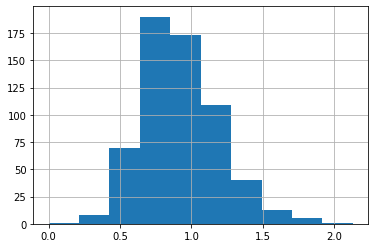

In [58]:
train.groupby('userId')['rating'].std().hist()

,userId,movieId,rating,timestamp
14430,91,2431,2.0,2005-04-05 15:58:44
43498,292,111,2.0,2010-02-09 01:49:19
73590,474,1784,3.5,2003-05-15 17:57:35
19181,124,110,3.5,2012-05-09 17:25:26
97254,605,4899,2.5,2010-06-22 03:21:21
...,...,...,...,...
6265,42,4005,4.0,2001-07-27 18:37:39
54886,364,141,4.0,1997-07-21 00:02:47
76820,480,6867,4.0,2007-05-14 17:19:31
860,6,981,3.0,1996-10-17 12:49:27


#### 영화 평점 기반 예측하기

In [59]:
movies = train.groupby('movieId')['rating'].mean().reset_index()
movies = movies.rename(columns={'rating':'predict'})
movies[:1]

,movieId,predict
0,1,3.902564


In [61]:
predict_by_movies = test.merge(movies, how='left', on='movieId')
predict_by_movies.sample()

,userId,movieId,rating,timestamp,predict
6069,376,33794,4.0,2013-04-03 13:10:43,3.811881


In [66]:
predict_by_movies.loc[predict_by_movies['predict'].isnull(), 'predict'] = train['rating'].mean()

In [68]:
mse = mean_squared_error(predict_by_movies['rating'], predict_by_movies['predict'])
rmse = np.sqrt(mse)
rmse

0.9825183061091307